In [1]:
import pandas as pd
import statistics as stats


df_exo = pd.read_csv(r"C:\Users\WOW\OneDrive\Desktop\AndrewLiang\PVInternship\PVInternship\PS_2025.06.25_09.08.07.csv")
df_exo = df_exo.drop("Unnamed: 21",axis = 1)
df_exo = df_exo.drop("Unnamed: 22",axis= 1 )
df_exo
# ALLL the data

#wat a beauty
# This is a list of all times planetary systems have been discovered
# I hope to answer the following questions:
# What is the most common discovery method?
# Which planetary system has the largest habitable zone/ which exoplanets are in their planetary system's habitable zone?
# What is the relationship between luminosity and effective temperature of the star(s)?


,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbsmax,...,pl_orbeccen,st_spectype,st_teff,st_rad,st_mass,sy_dist,sy_kmag,releasedate,st_teff.1,sy_kmag.1
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,323.21,1.178,...,0.238,G8 III,4874.0,13.76,2.09,93.1846,2.282,9/19/2023,4874.0,2.282
1,2,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,NaN,1.210,...,NaN,NaN,NaN,NaN,2.60,93.1846,2.282,7/23/2014,NaN,2.282
2,3,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03,1.290,...,0.231,G8 III,4742.0,19.00,2.70,93.1846,2.282,5/14/2014,4742.0,2.282
3,4,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,NaN,1.510,...,NaN,NaN,NaN,NaN,1.70,125.3210,1.939,7/23/2014,NaN,1.939
4,5,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.22,1.540,...,0.080,K4 III,4340.0,24.08,1.80,125.3210,1.939,5/14/2014,4340.0,1.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38495,38496,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,1274.60,2.510,...,0.242,F8 V,NaN,NaN,NaN,13.4054,2.859,9/18/2014,NaN,2.859
38496,38497,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,385.20,1.180,...,0.320,G9 III,4836.0,11.22,1.48,52.5973,2.184,1/10/2022,4836.0,2.184
38497,38498,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,NaN,0.580,...,NaN,NaN,NaN,NaN,1.40,56.1858,2.171,7/23/2014,NaN,2.171
38498,38499,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,136.75,0.680,...,0.000,NaN,4780.0,12.00,2.20,56.1858,2.171,5/14/2014,4780.0,2.171


In [2]:
# Which discovery method was the most common?

df = df_exo.drop_duplicates(subset = ["pl_name"]).reset_index()
df 
df["discoverymethod"].value_counts()        

#Transit is the most common discovery method

discoverymethod
Transit                          4387
Radial Velocity                  1126
Microlensing                      247
Imaging                            83
Transit Timing Variations          36
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          5
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64

In [3]:
# filters out all the duplicates, takes the first instance the exoplanet shows up
df = df_exo.groupby("pl_name").mean("pl_orbsmax").reset_index()
df

,pl_name,loc_rowid,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,st_teff,st_rad,st_mass,sy_dist,sy_kmag,st_teff.1,sy_kmag.1
0,11 Com b,2.0,2.0,1.0,2007.0,324.620000,1.226000,NaN,5505.066162,0.234500,4808.000000,16.380000,2.463333,93.1846,2.282,4808.000000,2.282
1,11 UMi b,5.0,1.0,1.0,2009.0,516.219985,1.526667,NaN,3818.094733,0.080000,4276.500000,26.935000,2.093333,125.3210,1.939,4276.500000,1.939
2,14 And b,8.0,1.0,1.0,2008.0,186.300000,0.761667,NaN,1224.550434,0.000000,4850.500000,11.275000,1.726667,75.4392,2.331,4850.500000,2.331
3,14 Her b,13.5,1.0,2.0,2002.0,1766.378417,2.814750,NaN,1642.383592,0.362925,5296.985000,0.976056,0.927029,17.9323,4.714,5296.985000,4.714
4,16 Cyg B b,20.5,3.0,1.0,1996.0,799.375000,1.662833,NaN,533.514528,0.676033,5728.594000,1.139245,1.016599,21.1397,4.651,5728.594000,4.651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,ups And b,38481.0,2.0,3.0,1996.0,4.616229,0.058895,NaN,219.960419,0.030200,6137.820000,1.614742,1.250839,13.4054,2.859,6137.820000,2.859
5917,ups And c,38487.5,2.0,3.0,1999.0,240.728533,0.827712,NaN,1275.328758,0.238933,6117.093333,1.614742,1.263549,13.4054,2.859,6117.093333,2.859
5918,ups And d,38493.5,2.0,3.0,1999.0,1285.346167,2.528382,NaN,1616.242590,0.281117,6117.093333,1.614742,1.263549,13.4054,2.859,6117.093333,2.859
5919,ups Leo b,38497.0,1.0,1.0,2021.0,385.200000,1.180000,NaN,162.092488,0.320000,4836.000000,11.220000,1.480000,52.5973,2.184,4836.000000,2.184


In [4]:
import math #for pi

# approximate habitable zone calculations with a huge asterisk (doesn't account for a lot of factors)
HatInRad = []
HatOutRad = []
Luminosity = []
HatPot = []


#L = 4πR²σT⁴

for i in range(len(df)):

    Lumin = (4 * math.pi * (df.loc[i, "st_rad"]**2) * (6.957 * (10**8))**2 * (df.loc[i,"st_teff"])**4  * (5.67 * 10**(-8)))/(3.83*10**26)
    inner_radius = (Lumin/ 1.1)**0.5
    outer_radius = (Lumin/ 0.53)**0.5
    orbit_dis = df.loc[i,"pl_orbsmax"]

    HatInRad.append(inner_radius)
    HatOutRad.append(outer_radius)
    Luminosity.append(Lumin)

    if (inner_radius < orbit_dis) & (orbit_dis < outer_radius):
        HatPot.append("True")

    else:
        HatPot.append("False")


df["HatInRad"] = HatInRad
df["HatOutRad"] = HatOutRad
df["Luminosity"] = Luminosity
df["HatPot"] = HatPot

df_Hat = df[df["HatPot"] == "True"].reset_index()
df_Hat


    

,index,pl_name,loc_rowid,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,...,st_rad,st_mass,sy_dist,sy_kmag,st_teff.1,sy_kmag.1,HatInRad,HatOutRad,Luminosity,HatPot
0,35,55 Cnc f,127.0,2.0,5.0,2007.0,260.810000,0.778586,NaN,47.391256,...,0.960245,0.918530,12.58550,4.015,5248.315000,4.015,0.756736,1.090192,0.629915,True
1,57,BD+14 4559 b,186.5,1.0,1.0,2009.0,268.940000,0.778500,NaN,398.866600,...,0.905000,0.675000,49.35200,7.336,4936.000000,7.336,0.630843,0.908824,0.437760,True
2,195,GJ 1002 b,526.0,1.0,2.0,2022.0,10.346500,0.045700,NaN,1.080000,...,0.137000,0.120000,4.84867,7.439,3024.000000,7.439,0.035843,0.051638,0.001413,True
3,199,GJ 1061 d,530.0,1.0,3.0,2020.0,13.031000,0.054000,NaN,1.640000,...,0.156000,0.120000,3.67278,6.610,2953.000000,6.610,0.038920,0.056070,0.001666,True
4,242,GJ 3293 b,625.5,1.0,4.0,2015.0,30.599350,0.143395,NaN,24.630000,...,0.404000,0.420000,20.19030,7.486,3466.000000,7.486,0.138855,0.200041,0.021209,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,5608,TOI-904 c,36771.5,1.0,2.0,2023.0,83.999550,0.312000,2.253917,NaN,...,0.529720,0.557000,46.08910,8.766,3881.100000,8.766,0.228286,0.328879,0.057326,True
99,5621,TRAPPIST-1 e,36816.0,1.0,7.0,2017.0,6.099311,0.028986,0.916000,0.694667,...,0.119867,0.087200,NaN,10.296,2548.333333,10.296,0.022271,0.032084,0.000546,True
100,5778,WASP-41 c,37735.0,1.0,2.0,2015.0,421.000000,1.070000,NaN,1010.699400,...,0.870000,0.930000,163.37100,9.677,5545.000000,9.677,0.765324,1.102563,0.644292,True
101,5785,WASP-47 c,37804.5,1.0,4.0,2015.0,584.728333,1.387667,NaN,427.641840,...,1.146167,1.052333,264.78000,10.192,5561.600000,10.192,1.014308,1.461263,1.131704,True


In [5]:
#Which planetary system has the largest habitable zone/ which exoplanets are in their planetary system's habitable zone?

HatRange =[]
for i in range(len(df_Hat)):
    hatrange = df_Hat.at[i,"HatOutRad"] - df_Hat.at[i,"HatInRad"]
    HatRange.append(hatrange)
df_Hat["HatRange"] = HatRange

print(df_Hat[df_Hat["HatRange"] == df_Hat["HatRange"].max()])
pl_name_Lar_ranged = df_Hat.at[22, "pl_name"]
pl_range_Lar_ranged = df_Hat["HatRange"].max()
print("The exoplanet system with the largest habitable zone: " + pl_name_Lar_ranged)
print("Habitable zone range: " + str(pl_range_Lar_ranged)[:4] + " au    or   " +  str(pl_range_Lar_ranged * 1.496 * 10**11)[:15] + " m")


print("There is " + str(len(df_Hat)) + " potentially habitable planets")
df_Hat[df_Hat["sy_dist"] == df_Hat["sy_dist"].min()]


    index      pl_name  loc_rowid  sy_snum  sy_pnum  disc_year  pl_orbper  \
22    720  HD 154391 b     2351.0      1.0      1.0     2023.0     5163.0   

    pl_orbsmax  pl_rade    pl_bmasse  ...  st_mass  sy_dist  sy_kmag  \
22        7.46      NaN  2892.238504  ...     2.07  100.947    3.896   

    st_teff.1  sy_kmag.1  HatInRad  HatOutRad  Luminosity  HatPot  HatRange  
22     4909.0      3.896  5.901774   8.502389   38.314028    True  2.600615  

[1 rows x 23 columns]
The exoplanet system with the largest habitable zone: HD 154391 b
Habitable zone range: 2.60 au    or   389052028752.72 m
There is 103 potentially habitable planets


,index,pl_name,loc_rowid,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,...,st_mass,sy_dist,sy_kmag,st_teff.1,sy_kmag.1,HatInRad,HatOutRad,Luminosity,HatPot,HatRange
90,5050,Proxima Cen b,35393.5,3.0,1.0,2016.0,11.185825,0.048353,NaN,1.113333,...,0.12105,1.30119,4.384,2975.0,4.384,0.036801,0.053018,0.00149,True,0.016216


(-25.0, 25.0)

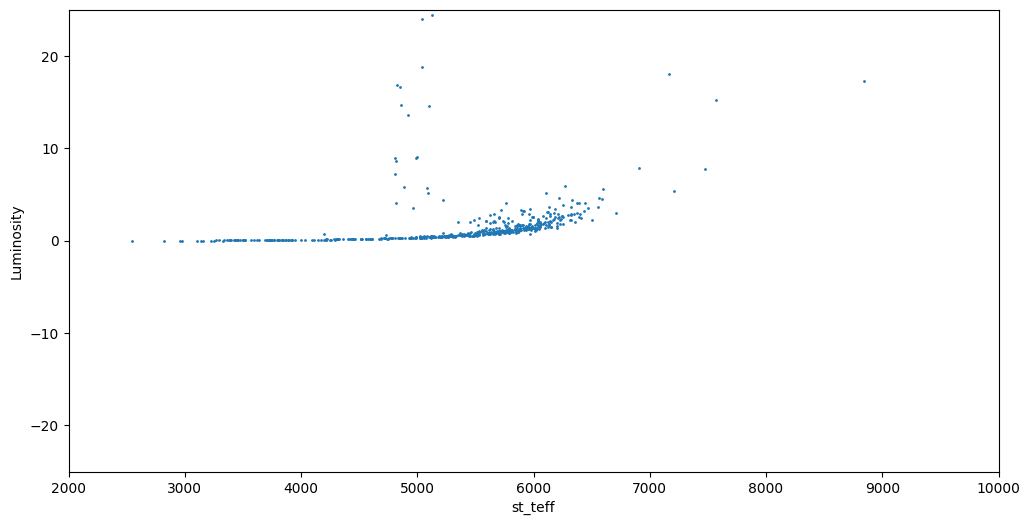

In [6]:
# Now time to graph the HR graph, the relationship between temperature and luminosity
import matplotlib.pyplot as plt

ax = df[::10].plot.scatter(x = "st_teff", y = "Luminosity", s= 1, figsize = (12,6))
plt.xlim(2000, 10000)
plt.ylim(-25,25)


Text(0, 0.5, 'Luminosity (Solar Luminosity)')

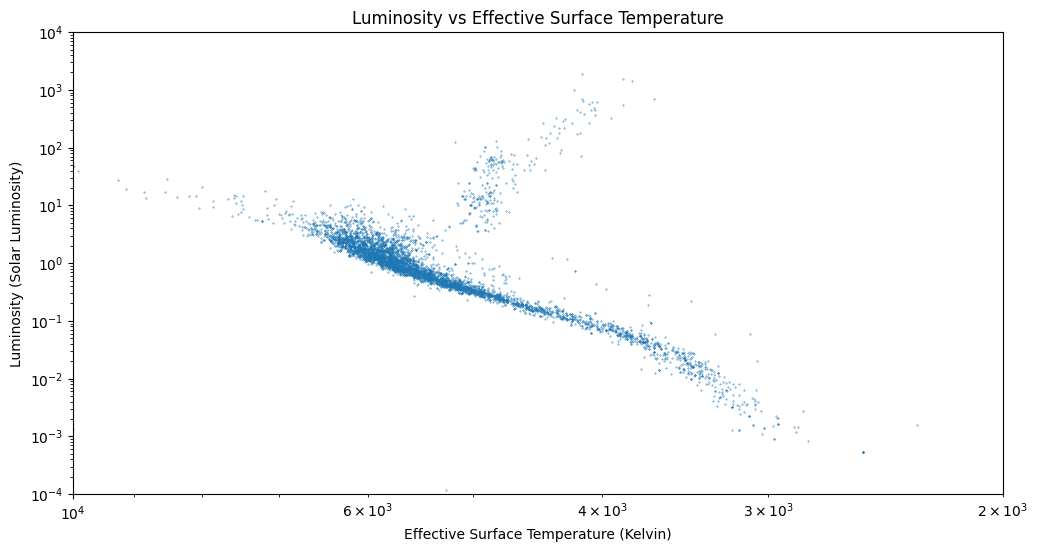

In [7]:
ax = df.plot.scatter(x = "st_teff", y = "Luminosity", s= 0.1, figsize = (12,6))
plt.xlim(2000, 10000)
plt.ylim(0.0001,10000)
plt.xscale("log")
plt.yscale("log")

ax.invert_xaxis()

plt.title("Luminosity vs Effective Surface Temperature")
plt.xlabel("Effective Surface Temperature (Kelvin)")
plt.ylabel("Luminosity (Solar Luminosity)")

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

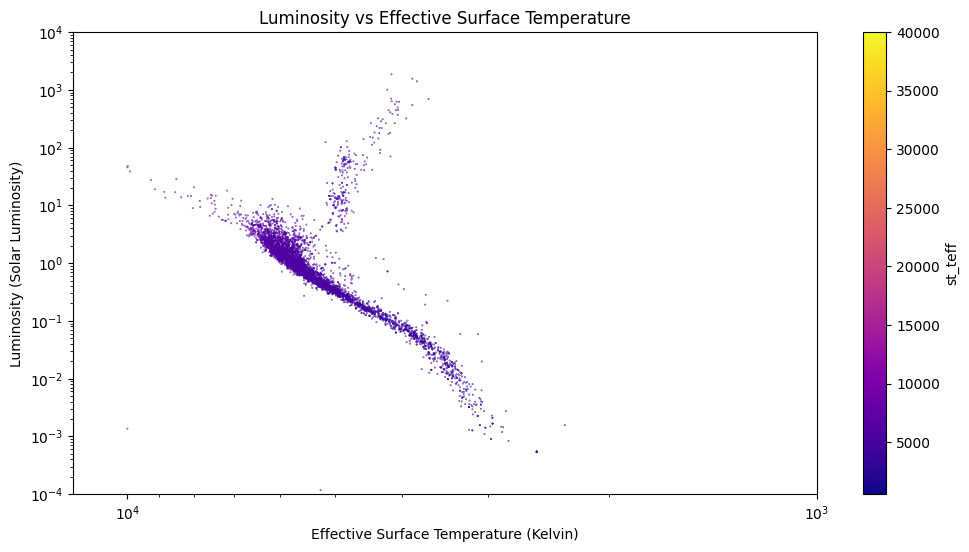

In [8]:
from matplotlib import colormaps


ax = df.plot.scatter(x = "st_teff", y = "Luminosity", s= 0.1, figsize = (12,6), cmap = "plasma", c = "st_teff")
plt.xlim(1000, 12000)
plt.ylim(0.0001,10000)
plt.xscale("log")
plt.yscale("log")

ax.invert_xaxis()

plt.title("Luminosity vs Effective Surface Temperature")
plt.xlabel("Effective Surface Temperature (Kelvin)")
plt.ylabel("Luminosity (Solar Luminosity)")



print(list(colormaps))

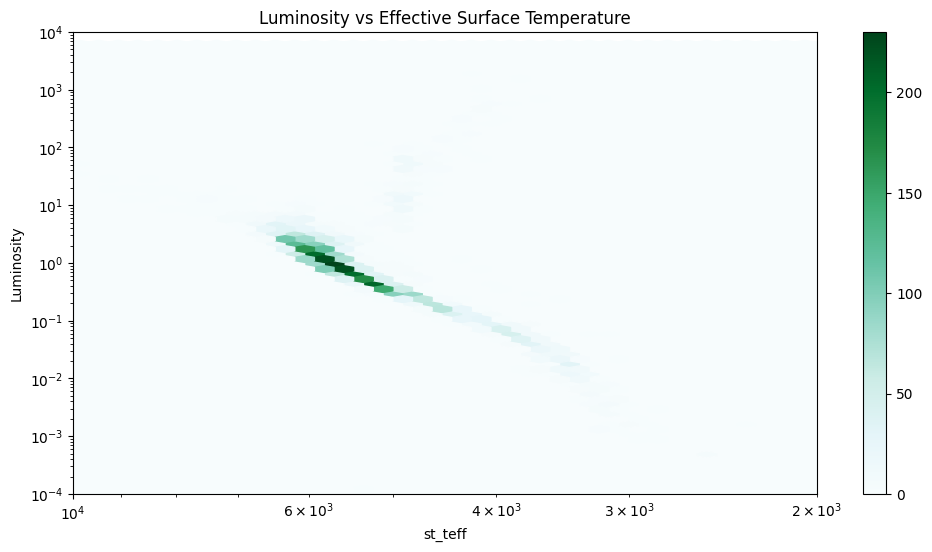

In [9]:
# Now I want to make a heat map
ax = df.plot.hexbin( x = "st_teff", y = "Luminosity",
                    xscale = "log",
                    yscale = "log",
                    figsize = (12,6), 
                    title = "Luminosity vs Effective Surface Temperature"
                    
                    )
ax.set_ylim(0.0001,10000)
ax.set_xlim(2000, 10000)
ax.invert_xaxis()

# mid imo

In [10]:
#Side Project star map?

df = pd.read_csv(r"C:\Users\WOW\Downloads\decompressed_data.csv")
pd.set_option('display.max_columns',None)
df.tail()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,pmra,pmdec,rv,mag,absmag,spect,ci,x,y,z,vx,vy,vz,rarad,decrad,pmrarad,pmdecrad,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
119621,119626,NaN,124953.0,5343.0,NaN,NaN,NaN,14.267833,18.911944,100000.0,43.0,-33.0,4.0,5.98,-14.02,A8III,NaN,-78412.269791,-52924.596727,32411.464139,0.0,0.0,0.0,3.735310,0.330076,2.084699e-07,9.000000e-08,NaN,NaN,Boo,1,119626,NaN,3.531832e+07,CN,6.01,5.98
119622,119627,NaN,152249.0,6263.0,NaN,NaN,NaN,16.903278,-41.850278,100000.0,11.0,-40.0,-24.0,6.45,-13.55,O9Ib,NaN,-21094.746400,-71439.730128,-66718.637827,0.0,0.0,0.0,4.425268,-0.730425,5.332950e-08,-2.028959e-07,NaN,NaN,Sco,1,119627,NaN,2.290868e+07,NaN,NaN,NaN
119623,119628,NaN,162678.0,6660.0,NaN,NaN,NaN,17.895972,-34.786111,100000.0,10.0,-3.0,-15.0,6.38,-13.62,B9V,NaN,-2236.451568,-82098.296888,-57051.449872,0.0,0.0,0.0,4.685155,-0.607132,4.848137e-08,-1.686478e-07,NaN,NaN,Sco,1,119628,NaN,2.443431e+07,NaN,NaN,NaN
119624,119629,NaN,168021.0,6848.0,NaN,NaN,NaN,18.312028,-18.619444,100000.0,11.0,5.0,4.0,6.84,-13.16,B0Ib,NaN,7732.703464,-94449.998121,-31928.093462,0.0,0.0,0.0,4.794078,-0.324971,5.332950e-08,-9.000000e-08,NaN,NaN,Sgr,1,119629,NaN,1.599558e+07,NaN,NaN,NaN
119625,119630,NaN,224960.0,9090.0,NaN,NaN,NaN,0.035361,-14.676111,100000.0,-13.0,-16.0,13.0,7.10,-12.90,S7.3e,NaN,96733.201804,895.534838,-25335.463013,0.0,0.0,0.0,0.009258,-0.256146,-6.302578e-08,-7.000000e-08,NaN,NaN,Cet,1,119630,NaN,1.258925e+07,W,14.80,7.10


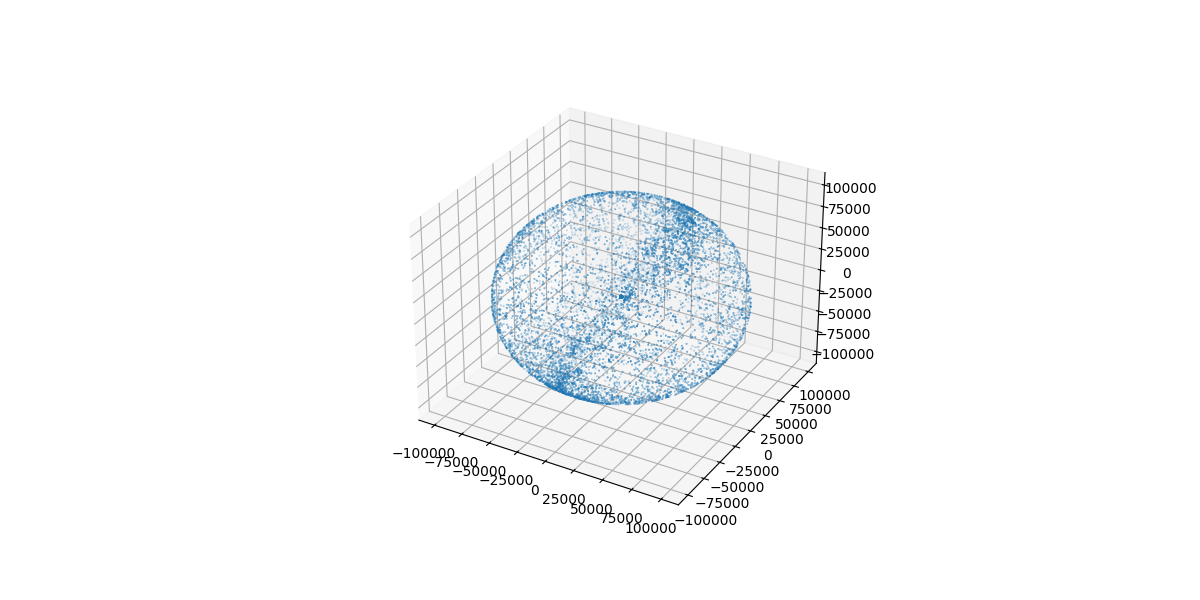

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib ipympl
plt.figure(figsize = (12,6))
ax = plt.axes(projection = '3d')
sample_df = df.sample(n = 100000)
fg = ax.scatter3D(sample_df.x,sample_df.y,sample_df.z,s = 0.1)

# ax.set_xlabel("x (parsec)")
# ax.set_ylabel("y (parsec)")
# ax.set_zlabel("z (parsec)")
# ax.set_title("Cartesian Coordinates of Stars")

# ax.grid(False)  #Free floating/ No axis n grid
# ax.set_axis_off()

fg